demo

In [385]:
from deepface import DeepFace
import cv2
import numpy as np
from retinaface import RetinaFace
import time
    
cap = cv2.VideoCapture(0)
start = time.time()
while True:
    end= time.time()-start
    ret, img = cap.read()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   
    if end > 1:
        faces = RetinaFace.detect_faces(path = img)
        if type(faces) == dict:
            box, landmarks, score = (faces['face_1']['facial_area'],
                                    faces['face_1']['landmarks'],
                                    faces['face_1']['score'])
            print(score)
            cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), color=(255, 0, 0), thickness=2)
            start = time.time()
            obj = DeepFace.analyze(path = img, actions = ['emotion'],enforce_detection = False)
            print(obj)                   

    cv2.imshow("", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows() 

0.9991576671600342
{'emotion': {'angry': 0.13204093556851149, 'disgust': 4.2610281969501784e-08, 'fear': 0.09999199537560344, 'happy': 0.0034999913623323664, 'sad': 0.6676809396594763, 'surprise': 0.00046382892833207734, 'neutral': 99.09632802009583}, 'dominant_emotion': 'neutral', 'region': {'x': 262, 'y': 223, 'w': 140, 'h': 140}}
0.9995821118354797
{'emotion': {'angry': 9.11465679524982e-08, 'disgust': 2.7024507191292494e-19, 'fear': 4.9575177853474866e-05, 'happy': 1.436022935704822e-10, 'sad': 0.027943183005194844, 'surprise': 8.434359535318728e-12, 'neutral': 99.97200965714512}, 'dominant_emotion': 'neutral', 'region': {'x': 0, 'y': 0, 'w': 480, 'h': 640}}


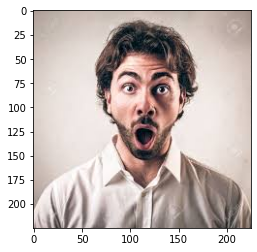

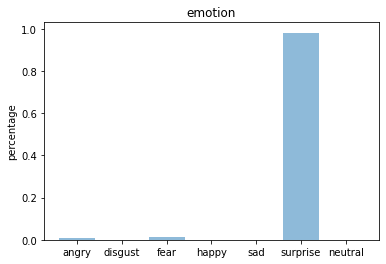

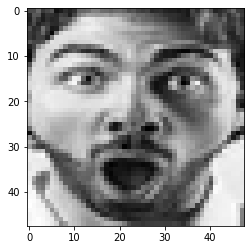

emo = surprise


In [1]:
from deepface import DeepFace
import cv2
import numpy as np
from retinaface import RetinaFace
import time
from PIL import Image
from keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt

img = "D:/Mask image data/face_emotion/surprise.jpg"
img = cv2.imread(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
def plt_emotion_analysis(emotions,x):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    plt.show()
    
    x = np.array(x, 'float32')
    x = x.reshape([48, 48])

    plt.gray()
    plt.imshow(x)
    plt.show()

def emotion(img, box):
    img = img[box[1]: box[3], box[0]:box[2]].copy()
    img=Image.fromarray(img).convert("L")
    img = img.resize((48, 48), Image.ANTIALIAS)
    x = img_to_array(img)

    x = np.expand_dims(x, axis = 0) 
    x /= 255
    from deepface.extendedmodels import Emotion
    model = Emotion.loadModel()
    custom = model.predict(x)
    plt_emotion_analysis(custom[0], x)
    return custom


faces = RetinaFace.detect_faces(img)
box, landmarks, score = (faces['face_1']['facial_area'],faces['face_1']['landmarks'],faces['face_1']['score'])
custom = emotion(img,box)
emo = np.where(custom[0] == max(custom[0]))
objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
print("emo = " +objects[emo[0][0]])

recognition


In [2]:
from deepface import DeepFace
import os
img = "C:/Users/apf_temp_admin/Pictures/20200712_160810.jpg"
df = DeepFace.find(path=img, db_path='D:/Mask_Project/user_img/NoMask', enforce_detection=False,
                               model_name ='ArcFace',detector_backend='retinaface')
print(os.path.basename(df.iloc[0]['identity']))



20170734_004.jpg


In [7]:
id_str = df[df['identity'].str.contains(str(20170734))]
print(id_str)

                                            identity  ArcFace_cosine
0  D:/Mask_Project/user_img/NoMask\20170734/20170...        0.476851
4  D:/Mask_Project/user_img/NoMask\20170734/20170...        0.514550
6  D:/Mask_Project/user_img/NoMask\20170734/20170...        0.526367
7  D:/Mask_Project/user_img/NoMask\20170734/20170...        0.556679


In [36]:

import Python.__default__ as default
import pickle
from retinaface import RetinaFace
import cv2
import matplotlib.pyplot as plt
import re
from deepface import DeepFace

def saveMaskedImage(path):
    '''Cover the underside of the nose from the face bounding box using a white box'''
    maskedImagePath = None
    studentID = os.path.basename(path)[0:8]
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = RetinaFace.detect_faces(img)
    
    if type(faces) == dict:
            box, landmarks, score = (faces['face_1']['facial_area'],
                                     faces['face_1']['landmarks'],
                                     faces['face_1']['score'])
    else:
        box, landmarks, score = [], [], 0        
        print("face not found")
        return False
        
    b = box[3] + box[1]
    b = b / 100 * 50
    cv2.rectangle(img, (box[0], int(b)), (box[2], box[3]), color=(255, 255, 255), thickness=-1)
    for (root, directories, files) in os.walk(f"{default.Mask_DB_Path}/{studentID}"):
        for file in files:
            if '.jpg' in file:
                maskedImagePath = os.path.join(root, file)
                
    if maskedImagePath == None:
        maskedImagePath = maskedImagePath+ "/" + studentID + "_000.jpg" 
    

    number = os.path.basename(maskedImagePath)
    number = int(number[-7:-4]) + 1
    number = format(number, '03')
    # dir , studentID + _ + number + extension
    savePath = os.path.join(os.path.dirname(maskedImagePath),
                            os.path.basename(maskedImagePath)[0:8] + "_" + number + os.path.splitext(maskedImagePath)[1])
    savePath = savePath.replace("\\", "/")
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(savePath, img)
    embedding = DeepFace.represent(img_path = savePath,
                                   enforce_detection = False,
                                   model_name ='ArcFace', 
                                   detector_backend = 'retinaface')
    
    with open(default.PKL_Mask_Path ,"ab") as w:
        pickle.dump([savePath, embedding], w)  

In [20]:
import re
path = r"D:\Mask_Project\user_img\NoMask\20170734"
path = path.replace("\\","/")
file_list =[]
from Python import __default__ as default
for (root, directories, files) in os.walk(default.Photo_Path):
    for file in files:
        if ".jpg" in file:
            file_list.append(str(file[0:8]))
print(file_list)

['20170705', '20170705', '20170705', '20170705', '20170705']


eye

In [6]:
import cv2
from retinaface import RetinaFace

    

cap = cv2.VideoCapture(0)
while True:
    ret, img = cap.read()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    faces = RetinaFace.detect_faces(img_path = img)
    
    if type(faces) == dict:
        box, landmarks, score = (faces['face_1']['facial_area'],
                                faces['face_1']['landmarks'],
                                faces['face_1']['score'])
    else:
        box, landmarks, score = None, None, 0
    cv2.imshow("", cv2.cvtColor(img, cv2.COLOR_RGB2BGR))

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    print(box, landmarks, score)
cap.release()
cv2.destroyAllWindows() 

None None 0
None None 0
None None 0
None None 0
None None 0
None None 0
[396, 168, 518, 362] {'right_eye': [486.3751, 247.45113], 'left_eye': [503.486, 250.59601], 'nose': [515.65405, 294.08142], 'mouth_right': [471.19733, 321.006], 'mouth_left': [481.03287, 325.53983]} 0.9988445043563843
[385, 162, 504, 342] {'right_eye': [469.7019, 234.17064], 'left_eye': [492.38745, 239.48222], 'nose': [501.79233, 274.7823], 'mouth_right': [458.49054, 300.92706], 'mouth_left': [473.26382, 306.87238]} 0.9994837045669556
[356, 162, 479, 331] {'right_eye': [424.6746, 225.54108], 'left_eye': [468.3929, 232.81268], 'nose': [463.1682, 263.96338], 'mouth_right': [422.62195, 291.48294], 'mouth_left': [452.17255, 298.328]} 0.9999232292175293
[327, 156, 451, 319] {'right_eye': [371.6978, 217.54446], 'left_eye': [428.19815, 221.91087], 'nose': [405.04742, 255.45676], 'mouth_right': [374.51245, 281.64703], 'mouth_left': [414.8993, 285.18732]} 0.9997946619987488
[325, 156, 447, 319] {'right_eye': [381.39413, 217

In [173]:
img_path = r"D:\Mask_Project\Senier-project\MaskTheFace-master\images\20200712_160810.jpg"
img_path =img_path.replace("\\","/")
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
faces = RetinaFace.detect_faces(img_path = img)
if type(faces) == dict:
        box, landmarks, score = (faces['face_1']['facial_area'],
                                faces['face_1']['landmarks'],
                                faces['face_1']['score'])
    

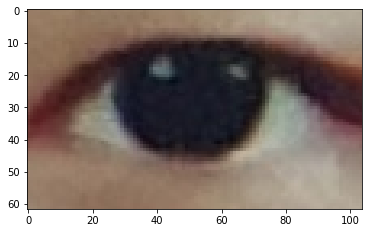

In [200]:
import matplotlib.pyplot as plt

x1,y1,x2,y2 = faces['face_1']['facial_area']
img3 = img[y1:y2,x1:x2]
x,y = img3.shape[0]//13,img3.shape[1]//17
img2 = img[int(landmarks['right_eye'][1])-y:int(landmarks['right_eye'][1]+y),int(landmarks['right_eye'][0])-x:int(landmarks['right_eye'][0])+x]

plt.imshow(img2)
plt.show()

[268.60968, 257.0337]


ValueError: zero-size array to reduction operation minimum which has no identity

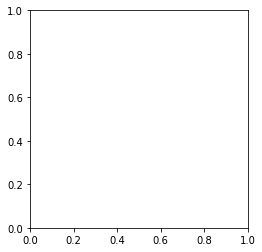

In [215]:
print(landmarks['right_eye'])
landmarks['left_eye']
import matplotlib.pyplot as plt
img2 = img[int(landmarks['right_eye'][1])-30:int(landmarks['right_eye'][1]+30),int(landmarks['right_eye'][0])-60:int(landmarks['right_eye'][0])+60]
plt.imshow(img2)
plt.show()

print(landmarks['left_eye'])
import matplotlib.pyplot as plt
img2 = img[int(landmarks['left_eye'][1])-30:int(landmarks['left_eye'][1]+30),
           int(landmarks['left_eye'][0])-60:int(landmarks['left_eye'][0])+60]
plt.imshow(img2)
plt.show()

In [202]:
from keras.models import load_model
from PIL import Image
import numpy as np
from keras.preprocessing.image import img_to_array
model = load_model(r'D:\Mask_Project\Senier-project\eye_blink_detector-master\models\2022_11_27_15_40_35.h5')
img5=Image.fromarray(img2).convert("L")
img5 = img5.resize((34, 26), Image.ANTIALIAS)
x = img_to_array(img5)

x = np.expand_dims(x, axis = 0) 
x /= 255
pred_l = model.predict(x)


In [204]:
def eye_plt(x):
    x[0] = np.array(x[0], 'float32')
    x = x.reshape([26, 34])
    plt.title("left")
    plt.gray()
    plt.imshow(x[0])
    plt.show()
    
    x[1] = np.array(x[1], 'float32')
    x[1] = x[1].reshape([26, 34])
    plt.title("right")
    plt.gray()
    plt.imshow(x[1])
    plt.show()
    
def eye_blink(img, box, landmarks):
    img = img[box[1]: box[3], box[0]:box[2]].copy()
    x,y = img.shape[0]//13, img.shape[1]//17
    eye_l = img[int(landmarks['left_eye'][1])-y:int(landmarks['left_eye'][1]+y),
                int(landmarks['left_eye'][0])-x:int(landmarks['left_eye'][0])+x]
    
    eye_r = img[int(landmarks['right_eye'][1])-y:int(landmarks['right_eye'][1]+y),
                int(landmarks['right_eye'][0])-x:int(landmarks['right_eye'][0])+x]
    eye_r = cv2.flip(eye_r, flipCode=1)
    
    
    eye_r=Image.fromarray(eye_r).convert("L")
    eye_l=Image.fromarray(eye_l).convert("L")
    eye_l = eye_l.resize((34, 26), Image.ANTIALIAS)
    eye_r = eye_r.resize((34, 26), Image.ANTIALIAS)
    
    x_r = img_to_array(eye_r)
    x_l = img_to_array(eye_l)
    
    x_l = np.expand_dims(x_l, axis = 0) 
    x_r = np.expand_dims(x_r, axis = 0) 
    
    x_r /= 255
    x_l /= 255

    eye_model = load_model(r'D:\Mask_Project\Senier-project\eye_blink_detector-master\models\2022_11_27_15_40_35.h5')
    
    left = eye_model.predict(x_l)
    right = eye_model.predict(x_r)
    return [left,right] ,[x_l,x_r]


In [ ]:
img2 = img[box[1]: box[3], box[0]:box[2]].copy()

x,y = img.shape[0]//13, img.shape[1]//17
eye_l = img[int(landmarks['left_eye'][1])-y:int(landmarks['left_eye'][1]+y),
            int(landmarks['left_eye'][0])-x:int(landmarks['left_eye'][0])+x]
eye_l=Image.fromarray(eye_l).convert("L")
eye_l = eye_l.resize((34, 26), Image.ANTIALIAS)
plt.imshow(eye_l)
plt.show()
x_l = img_to_array(eye_l)
x_l = np.expand_dims(x_l, axis = 0) 
x_l /= 255

eye_model = load_model(r'D:\Mask_Project\Senier-project\eye_blink_detector-master\models\2022_11_27_15_40_35.h5')

left = eye_model.predict(x_l)
print(left)

In [276]:
from deepface import DeepFace
import cv2
import numpy as np
from retinaface import RetinaFace
import time
from PIL import Image
from keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from keras.models import load_model
def eye_plt(x):
    x[0] = np.array(x[0], 'float32')
    x[0] = x[0].reshape([26, 34])
    plt.title("left")
    plt.gray()
    plt.imshow(x[0])
    plt.show()
    
    x[1] = np.array(x[1], 'float32')
    x[1] = x[1].reshape([26, 34])
    plt.title("right")
    plt.gray()
    plt.imshow(x[1])
    plt.show()
    
def eye_blink(img, box, landmarks):
    face = img[box[1]: box[3], box[0]:box[2]].copy()
    x,y = face.shape[0]//13, face.shape[1]//17
    eye_l = img[int(landmarks['left_eye'][1])-y:int(landmarks['left_eye'][1]+y),
                int(landmarks['left_eye'][0])-x:int(landmarks['left_eye'][0])+x]
    
    eye_r = img[int(landmarks['right_eye'][1])-y:int(landmarks['right_eye'][1]+y),
                int(landmarks['right_eye'][0])-x:int(landmarks['right_eye'][0])+x]
    eye_r = cv2.flip(eye_r, flipCode=1)
    
    
    eye_r=Image.fromarray(eye_r).convert("L")
    eye_l=Image.fromarray(eye_l).convert("L")
    eye_l = eye_l.resize((34, 26), Image.ANTIALIAS)
    eye_r = eye_r.resize((34, 26), Image.ANTIALIAS)
    
    x_r = img_to_array(eye_r)
    x_l = img_to_array(eye_l)
    
    x_l = np.expand_dims(x_l, axis = 0) 
    x_r = np.expand_dims(x_r, axis = 0) 
    
    x_r /= 255
    x_l /= 255

    eye_model = load_model(r'D:\Mask_Project\Senier-project\eye_blink_detector-master\models\2022_11_27_15_40_35.h5')
    
    left = eye_model.predict(x_l)
    right = eye_model.predict(x_r)
    return left,right ,[x_l,x_r]

In [281]:
a,b ,c=eye_blink(img, box, landmarks)
a[0][0]

0.36554894

In [285]:
img = r"D:\Mask_Project\WIN_20221130_03_44_55_Pro.jpg"
img2= r"D:\Mask_Project\WIN_20221130_03_44_57_Pro.jpg"
df = DeepFace.verify(img1_path=img, img2_path=img2, enforce_detection=False,
                               model_name ='ArcFace',detector_backend='retinaface')
df

{'verified': True,
 'distance': 0.18698305236614166,
 'threshold': 0.68,
 'model': 'ArcFace',
 'detector_backend': 'retinaface',
 'similarity_metric': 'cosine'}